In [1]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import plot_model
from keras import Model
from keras.callbacks import LearningRateScheduler
from keras.backend import clear_session
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Train Keras model

In [2]:
img_shape = (224, 224)
clear_session()

pre_trained_model = VGG16(input_shape=img_shape + (3,), 
                                include_top=False, 
                                weights=None) #'imagenet')

In [4]:
#inception_v3_weights_file = r'model\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [5]:
#pre_trained_model.load_weights(inception_v3_weights_file)

In [6]:
for pre_trained_layer in pre_trained_model.layers:
  pre_trained_layer.trainable = True

In [7]:
last_layer = pre_trained_model.layers[-1]
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [8]:
# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = Dense(3, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

In [37]:
#my model 76%
model = Sequential([
    Conv2D(16, (3, 3), input_shape=img_shape + (3,), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),  # this converts our 3D feature maps to 1D feature vectors
    Dense(64, activation='relu'),
    Dropout(0.20),
    Dense(3, activation='softmax'),
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=img_shape,  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=img_shape,
        batch_size=batch_size,
        class_mode='categorical')

Found 1245 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [6]:
# lr debug callback
#lr_schedule = LearningRateScheduler(
#    lambda epoch: 1e-8 * 10**(epoch / 20))

In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=800 // batch_size, 
    #callbacks=[lr_schedule],
)

Epoch 1/15
125/125 [==============================] - 122s 975ms/step - loss: 0.3049 - accuracy: 0.8763 - val_loss: 0.9816 - val_accuracy: 0.7494
Epoch 2/15
125/125 [==============================] - 113s 907ms/step - loss: 0.2673 - accuracy: 0.8912 - val_loss: 1.5745 - val_accuracy: 0.7172
Epoch 3/15
125/125 [==============================] - 112s 894ms/step - loss: 0.2563 - accuracy: 0.9042 - val_loss: 0.3031 - val_accuracy: 0.7506
Epoch 4/15
125/125 [==============================] - 112s 894ms/step - loss: 0.2627 - accuracy: 0.8982 - val_loss: 1.6380 - val_accuracy: 0.6981
Epoch 5/15
125/125 [==============================] - 113s 903ms/step - loss: 0.2099 - accuracy: 0.9244 - val_loss: 0.7060 - val_accuracy: 0.7772
Epoch 6/15
125/125 [==============================] - 112s 892ms/step - loss: 0.2002 - accuracy: 0.9279 - val_loss: 1.5306 - val_accuracy: 0.7376
Epoch 7/15
125/125 [==============================] - 112s 893ms/step - loss: 0.1807 - accuracy: 0.9417 - val_loss: 1.1333 -

In [39]:
#for layer in model.layers:
#   layer.trainable = False
for layer in model.layers[-6:]:
   layer.trainable = True

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=800 // batch_size, 
    #callbacks=[lr_schedule],
)

Epoch 1/15
125/125 [==============================] - 95s 760ms/step - loss: 0.9587 - accuracy: 0.6274 - val_loss: 0.5361 - val_accuracy: 0.6671
Epoch 2/15
125/125 [==============================] - 89s 715ms/step - loss: 0.7516 - accuracy: 0.6926 - val_loss: 1.0872 - val_accuracy: 0.6535
Epoch 3/15
125/125 [==============================] - 89s 712ms/step - loss: 0.6726 - accuracy: 0.7121 - val_loss: 0.5604 - val_accuracy: 0.6835
Epoch 4/15
125/125 [==============================] - 91s 729ms/step - loss: 0.6334 - accuracy: 0.7251 - val_loss: 1.2466 - val_accuracy: 0.6713
Epoch 5/15
125/125 [==============================] - 89s 710ms/step - loss: 0.5932 - accuracy: 0.7543 - val_loss: 0.5734 - val_accuracy: 0.6861
Epoch 6/15
125/125 [==============================] - 89s 716ms/step - loss: 0.4998 - accuracy: 0.7937 - val_loss: 1.7157 - val_accuracy: 0.7057
Epoch 7/15
125/125 [==============================] - 89s 715ms/step - loss: 0.5091 - accuracy: 0.7885 - val_loss: 0.7421 - val_ac

In [55]:
#model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

### Test Saving

### Plotting Results

In [26]:
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=img_shape,
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)

Found 315 images belonging to 3 classes.


In [27]:
y_pred = model.predict_generator(validation_generator)
y_pred = y_pred.argmax(axis=1)

In [28]:
class_names = np.array(list(validation_generator.class_indices.keys()))

In [29]:
print(classification_report(validation_generator.classes, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

        healthy       0.87      0.93      0.90       159
red_spider_mite       0.40      0.24      0.30        34
           rust       0.75      0.76      0.76       122

       accuracy                           0.79       315
      macro avg       0.67      0.64      0.65       315
   weighted avg       0.77      0.79      0.78       315



In [15]:
#file_name = 'latest_model_3categorical.h5'
#model.save(file_name)

In [16]:
#model.save_weights('weights_' + file_name)  # always save your weights after training or during training

In [17]:
#model = load_model('classification.h5')

In [18]:
#plot_model(model)

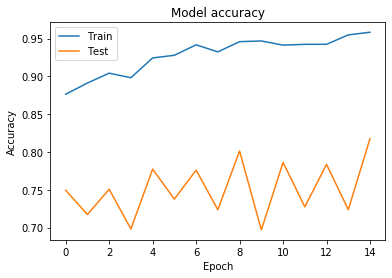

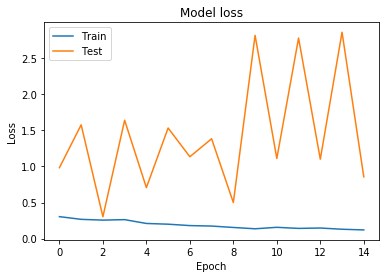

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
import seaborn as sns
import pandas as pd

In [32]:
# Compute confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

In [33]:
cm_df =  pd.DataFrame(cm, columns=class_names, index=class_names)

In [34]:
cm_df

,healthy,red_spider_mite,rust
healthy,148,1,10
red_spider_mite,5,8,21
rust,18,11,93


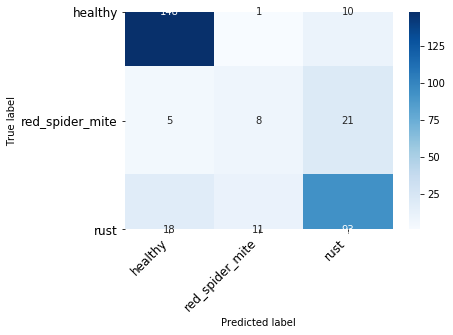

In [35]:
heatmap = sns.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues);
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.ylabel('True label');
plt.xlabel('Predicted label');